In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
velocity_field = "0.3FixedGradGRFSamples100000_28x28_1_1.5"
geometry = "transmission"

recpos = np.load("data_for_cs163/{}_{}/RecPos.npy".format(velocity_field, geometry))
srcpos = np.load("data_for_cs163/{}_{}/SouPos.npy".format(velocity_field, geometry))
vel = np.load("data_for_cs163/{}.npy".format(velocity_field))  # km / s
tt = np.load("data_for_cs163/{}_{}/TT_0_to_100000.npy".format(velocity_field, geometry))  # s

dx = 0.25  # km
dz = 0.25  # km
nx = vel.shape[0]
nz = vel.shape[1]
nsrc = tt.shape[0]
nrec = tt.shape[1]
xcoor = np.arange(nx) * dx
zcoor = np.arange(nz) * dz
xx, zz = np.meshgrid(xcoor, zcoor, indexing='ij')
srcx, srcz = xcoor[srcpos[:, 0]], zcoor[srcpos[:, 1]]
recx, recz = xcoor[recpos[:, 0]], zcoor[recpos[:, 1]]

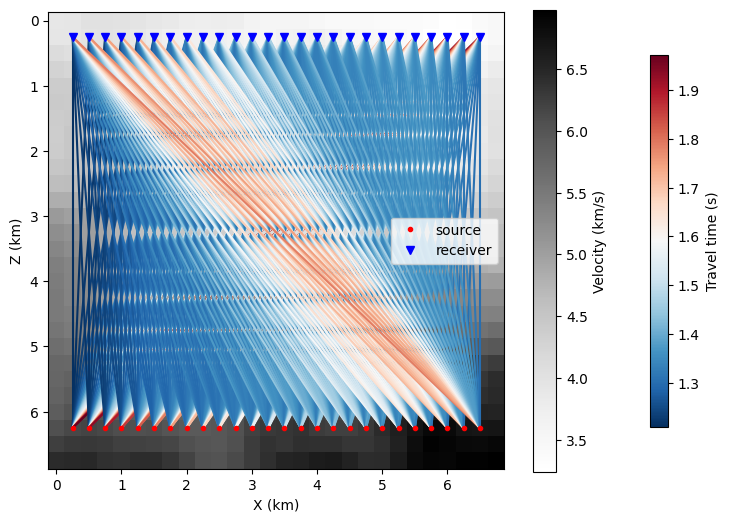

In [3]:
idx = 0
tti = tt[:, :, idx]
fig, ax = plt.subplots(figsize=(8, 6))
cmap = plt.get_cmap('RdBu_r')
ax.set_aspect(1)
tmin = tti.min()
tmax = tti.max()
vim = ax.pcolormesh(xx, zz, vel[:, :, idx], cmap='Greys')
for i in range(nsrc):
    for j in range(nrec):
        color = cmap((tti[i, j] - tmin) / (tmax - tmin))   
        ax.plot([srcx[i], recx[j]], [srcz[i], recz[j]], color=color, alpha=1)

ax.plot(srcx, srcz, '.', color='r', label='source')
ax.plot(recx, recz, 'v', color='b', label='receiver')
ax.legend()
ax.invert_yaxis()
ax.set_xlabel("X (km)")
ax.set_ylabel("Z (km)")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=tmin, vmax=tmax))
cbar = plt.colorbar(sm, ax=ax, fraction=0.03)
cbar.set_label('Travel time (s)')
cbar = plt.colorbar(vim, ax=ax)
cbar.set_label('Velocity (km/s)')
plt.savefig('SouRec_tran.png')